In [1523]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import math
import re
import matplotlib.pyplot as plt

from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException



In [1312]:
Loc_df = pd.read_csv("raw_project_data_location_table.csv")
Stones_df = pd.read_csv("project_data_gemstones_table.csv")
# Loc_df = Loc_df.drop("Unnamed: 0",axis=1)
Stones_df = Stones_df.drop("Unnamed: 0",axis=1)
# Loc_df.drop_duplicates(subset=['Location URL','Location Name'],axis = 0, inplace=True)
Loc_df.reset_index(drop=True,inplace=True)
Loc_df["Latitude"] = None
Loc_df["Longitude"] = None
Loc_df.head()

,Unnamed: 0,index,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude
0,0,0,https://www.mindat.org/loc-14762.html,NaN,Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,NaN,"31.2612199,35.214581","['Ag', 'Al', 'B', 'Ba', 'C', 'Ca', 'Ce', 'Cl',...",None,None
1,1,2,https://www.mindat.org//loc-145486.html,NaN,NaN,", Israel,i,Central District (HaMerkaz District...",NaN,NaN,"32.620121002197266,35.0147705078125",NaN,None,None
2,2,3,https://www.mindat.org//loc-145489.html,NaN,Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,NaN,"31.7959242,35.2119808","['Al', 'B', 'C', 'Ca', 'Cl', 'Cr', 'F', 'Fe', ...",None,None
3,3,4,https://www.mindat.org//loc-145488.html,NaN,NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,NaN,"32.6075587,35.2890861","['Al', 'C', 'Ca', 'H', 'O', 'Si']",None,None
4,4,5,https://www.mindat.org//loc-205351.html,NaN,NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,NaN,"31.2612199,35.214581","['Al', 'C', 'Ca', 'Cl', 'Fe', 'H', 'K', 'Mg', ...",None,None


In [1314]:
def clear_strings(Ser,column):
    regex = re.compile('[^a-zA-Z]')
    regex2 = re.compile('[ⓘ]')
    i = 0
    for s in Ser:
        s = regex.sub('', str(s))
        s = regex2.sub('', str(s))
        s = re.sub(r"(\w)([A-Z])", r"\1 \2",str(s))
        Loc_df[column][i] = s
        i += 1
clear_strings(Loc_df["Minerals Recorded"],"Minerals Recorded")
clear_strings(Loc_df['Rock Types'],"Rock Types")
for i in Loc_df.index:
    if(len(str(Loc_df["Minerals"][i]))<3):
        Loc_df["Minerals"][i]=None
    location_name = Loc_df["Location Name"][i]
    if(str(location_name).find("Click")!=-1):
        Loc_df["Location Name"][i] = location_name[:(location_name).find("Click")]

<ipython-input-1314-813874f9687d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df[column][i] = s


In [1409]:

i=0

def to_float(string):
    dot = string.find(".")
    s = "0."+string[dot+1:]
    to_float = float(string[:dot]) + float(s)
    return to_float


for coords in Loc_df["Decimal Coordinates"]:
#     if(math.isnan(float(coords))):continue
    Long_start = str(coords).find(",")
    lat = to_float(coords[0:Long_start])
    long = to_float(coords[Long_start+1:])
    Loc_df["Latitude"][i] = (lat)
    Loc_df["Longitude"][i] = (long)
    i+=1


In [1410]:
# Loc_df.to_csv("raw_project_data_location_table.csv")

In [1411]:

# Loc_df = Loc_df.loc[10:20] ################################resizinggggggg

In [1412]:
Loc_df

,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,https://www.mindat.org/loc-14762.html,Lapis Lazuli Unakite,Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,15,"31.2612199,35.214581",Ag Al B Ba C Ca Ce Cl Cr Cu F Fe Gd H K La Mg ...,31.261220,35.214581,...,1,0,1,1,0,1,0,1,1,7
1,https://www.mindat.org//loc-145486.html,Lapis Lazuli Unakite,NaN,", Israel,i,Central District (HaMerkaz District...",NaN,15,"32.620121002197266,35.0147705078125",NaN,32.620121,35.014771,...,0,0,0,0,0,0,0,0,0,7
2,https://www.mindat.org//loc-145489.html,Lapis Lazuli Unakite,Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,15,"31.7959242,35.2119808",Al B C Ca Cl Cr F Fe H K Mg N Na O P Si Sn Ti ...,31.795924,35.211981,...,1,0,0,1,0,0,0,0,1,7
3,https://www.mindat.org//loc-145488.html,Lapis Lazuli Unakite,NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,15,"32.6075587,35.2890861",Al C Ca H O Si,32.607559,35.289086,...,0,0,0,0,0,0,0,0,0,7
4,https://www.mindat.org//loc-205351.html,Lapis Lazuli Unakite,NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,7,"31.2612199,35.214581",Al C Ca Cl Fe H K Mg Mn Na Ni O Si Ti Zn,31.261220,35.214581,...,1,0,0,0,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,https://www.mindat.org//loc-193574.html,Diopside Lapis Lazuli Unakite Zoisite,NaN,", Cochise Mining District, Little Dragoon Moun...",NaN,13,"32.06556,-110.04056",Valid Species Al Ca Cu Fe H K Mo O S Si Zn,47.204830,12.247430,...,0,0,0,0,0,0,0,1,0,6
1604,https://www.mindat.org//loc-17150.html,Diopside Lapis Lazuli Unakite Zoisite,Sandand Gravel,", Palm Springs, Riverside Co., California, USA...",NaN,15,"33.89747,-116.53778",Al B C Ca F Fe H K Mg Mn Na O Si Ti,47.056400,11.908560,...,1,0,0,0,0,0,0,0,0,6
1605,https://www.mindat.org//loc-6134.html,Apatite Cordierite Kyanite Lapis Lazuli Unakit...,NaN,", Lyon Co., Nevada, USA,i,Silver City Mining D...",NaN,12,"39.26361,-119.64056",Ag Al As Au B C Ca Cu Fe H K Mg Mo Na O Pb S S...,40.878890,115.344720,...,0,0,0,0,1,0,0,1,0,3
1606,https://www.mindat.org//loc-17176.html,Lapis Lazuli Unakite Zoisite,Feldspar,", Mitchell Co., North Carolina, USA,i,Pine Mou...",NaN,2,"35.94305,-82.09000",Al Ca Cu F Fe H K Mg Mn O P Si Ti U,34.458330,110.083330,...,1,0,1,0,0,0,0,0,0,7


In [1320]:
# adding all stones to location
for ind in Loc_df.index:
    stones_list = []
    for i in Stones_df.index:
        for loc in Stones_df["Locations_url"][i].split():
            loc_s = loc.find("/loc")
            loc_e = loc.find(".html")
            loc = loc[loc_s+1:loc_e+1]
            if (Loc_df["Location URL"][ind].find(loc)!=-1):
                stones_list.append(Stones_df["Name"][i])
    Loc_df["Stone Refernced"][ind] = stones_list


<ipython-input-1320-2812c3192a43>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df["Stone Refernced"][ind] = stones_list


,Unnamed: 0,index,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude
0,0,0,https://www.mindat.org/loc-14762.html,"[Lapis Lazuli, Unakite]",Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,NaN,"31.2612199,35.214581","['Ag', 'Al', 'B', 'Ba', 'C', 'Ca', 'Ce', 'Cl',...",None,None
1,1,2,https://www.mindat.org//loc-145486.html,"[Lapis Lazuli, Unakite]",nan,", Israel,i,Central District (HaMerkaz District...",nan,NaN,"32.620121002197266,35.0147705078125",NaN,None,None
2,2,3,https://www.mindat.org//loc-145489.html,"[Lapis Lazuli, Unakite]",Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,NaN,"31.7959242,35.2119808","['Al', 'B', 'C', 'Ca', 'Cl', 'Cr', 'F', 'Fe', ...",None,None
3,3,4,https://www.mindat.org//loc-145488.html,"[Lapis Lazuli, Unakite]",nan,", Israel,i,Jerusalem District,District, Israel...",nan,NaN,"32.6075587,35.2890861","['Al', 'C', 'Ca', 'H', 'O', 'Si']",None,None
4,4,5,https://www.mindat.org//loc-205351.html,"[Lapis Lazuli, Unakite]",nan,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,NaN,"31.2612199,35.214581","['Al', 'C', 'Ca', 'Cl', 'Fe', 'H', 'K', 'Mg', ...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1603,1612,https://www.mindat.org//loc-193574.html,"[Diopside, Lapis Lazuli, Unakite, Zoisite]",nan,", Cochise Mining District, Little Dragoon Moun...",nan,BSk : Cold semi-arid (steppe) climate,"32.06556,-110.04056","['Valid Species', 'Al', 'Ca', 'Cu', 'Fe', 'H',...",32.0656,-109.959
1604,1604,1613,https://www.mindat.org//loc-17150.html,"[Diopside, Lapis Lazuli, Unakite, Zoisite]",Sandand Gravel,", Palm Springs, Riverside Co., California, USA...",nan,Csa : Hot-summer Mediterranean climate,"33.89747,-116.53778","['Al', 'B', 'C', 'Ca', 'F', 'Fe', 'H', 'K', 'M...",33.8975,-115.462
1605,1605,1614,https://www.mindat.org//loc-6134.html,"[Apatite, Cordierite, Kyanite, Lapis Lazuli, U...",nan,", Lyon Co., Nevada, USA,i,Silver City Mining D...",nan,Csb : Warm-summer Mediterranean climate,"39.26361,-119.64056","['Ag', 'Al', 'As', 'Au', 'B', 'C', 'Ca', 'Cu',...",39.2636,-118.359
1606,1606,1615,https://www.mindat.org//loc-17176.html,"[Lapis Lazuli, Unakite, Zoisite]",Feldspar,", Mitchell Co., North Carolina, USA,i,Pine Mou...",nan,Cfb : Temperate oceanic climate,"35.94305,-82.09000","['Al', 'Ca', 'Cu', 'F', 'Fe', 'H', 'K', 'Mg', ...",35.943,-81.91


In [1343]:
Loc_df

,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude
0,https://www.mindat.org/loc-14762.html,"['Lapis Lazuli', 'Unakite']",Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,NaN,"31.2612199,35.214581","['Ag', 'Al', 'B', 'Ba', 'C', 'Ca', 'Ce', 'Cl',...",NaN,NaN
1,https://www.mindat.org//loc-145486.html,"['Lapis Lazuli', 'Unakite']",NaN,", Israel,i,Central District (HaMerkaz District...",NaN,NaN,"32.620121002197266,35.0147705078125",NaN,NaN,NaN
2,https://www.mindat.org//loc-145489.html,"['Lapis Lazuli', 'Unakite']",Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,NaN,"31.7959242,35.2119808","['Al', 'B', 'C', 'Ca', 'Cl', 'Cr', 'F', 'Fe', ...",NaN,NaN
3,https://www.mindat.org//loc-145488.html,"['Lapis Lazuli', 'Unakite']",NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,NaN,"32.6075587,35.2890861","['Al', 'C', 'Ca', 'H', 'O', 'Si']",NaN,NaN
4,https://www.mindat.org//loc-205351.html,"['Lapis Lazuli', 'Unakite']",NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,NaN,"31.2612199,35.214581","['Al', 'C', 'Ca', 'Cl', 'Fe', 'H', 'K', 'Mg', ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1603,https://www.mindat.org//loc-193574.html,"['Diopside', 'Lapis Lazuli', 'Unakite', 'Zoisi...",NaN,", Cochise Mining District, Little Dragoon Moun...",NaN,13,"32.06556,-110.04056","['Valid Species', 'Al', 'Ca', 'Cu', 'Fe', 'H',...",32.06556,-109.95944
1604,https://www.mindat.org//loc-17150.html,"['Diopside', 'Lapis Lazuli', 'Unakite', 'Zoisi...",Sandand Gravel,", Palm Springs, Riverside Co., California, USA...",NaN,15,"33.89747,-116.53778","['Al', 'B', 'C', 'Ca', 'F', 'Fe', 'H', 'K', 'M...",33.89747,-115.46222
1605,https://www.mindat.org//loc-6134.html,"['Apatite', 'Cordierite', 'Kyanite', 'Lapis La...",NaN,", Lyon Co., Nevada, USA,i,Silver City Mining D...",NaN,12,"39.26361,-119.64056","['Ag', 'Al', 'As', 'Au', 'B', 'C', 'Ca', 'Cu',...",39.26361,-118.35944
1606,https://www.mindat.org//loc-17176.html,"['Lapis Lazuli', 'Unakite', 'Zoisite']",Feldspar,", Mitchell Co., North Carolina, USA,i,Pine Mou...",NaN,2,"35.94305,-82.09000","['Al', 'Ca', 'Cu', 'F', 'Fe', 'H', 'K', 'Mg', ...",35.94305,-81.91000


In [1336]:
Loc_df.to_csv("Cleaned_project_data_location_table.csv")
#####################!@$%#$&%^(^&*($%$Q#@!$+*(&)%$#@!$+*(&)%#$@!#$+*(^&*#@$$~!@#$#%&*%(^&$*&#%$))))

In [1358]:
# Loc_df = pd.read_csv("Cleaned_project_data_location_table.csv")
# Loc_df.drop(["Unnamed: 0","index"],axis=1,inplace=True)

In [1359]:
# Claimate cleaning and categorizing
Climate_name = []
def Climate_to_num():
    for i in Loc_df.index:
        for ind in Climate_df.index:
            if(Loc_df['Climate'][i]==Climate_df[0][ind]):
                Loc_df['Climate'][i]=ind

for climate in Loc_df['Climate'].unique():
    if(i==0):
        i+=1
        continue
    climate = str(climate)
    Climate_name.append(climate)
Climate_df = pd.DataFrame(Climate_name)
Climate_df.drop(0,inplace=True)
Climate_df.to_csv("Climate_dictionary.csv")
Climate_to_num()
Climate_df

<ipython-input-1359-48a8eeda23c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df['Climate'][i]=ind


,0
1,Dfb : Warm-summer humid continental climate
2,Cfb : Temperate oceanic climate
3,Cwa : Monsoon-influenced humid subtropical cli...
4,Dfc : Subarctic climate
5,Cfa : Humid subtropical climate
6,"Aw : Tropical savanna, wet"
7,BSh : Hot semi-arid (steppe) climate
8,BWk : Cold desert climate
9,BWh : Hot deserts climate
10,ET : Tundra


In [1360]:
def make_strings_list(Loc_df,Column):
    Column_list=[]
    i=0
    for s in Loc_df[Column]:
        if(type(s)==str):
            s = re.sub('[^a-zA-Z ]+', '', s)
            Loc_df[Column][i] = s
            while(s.find(' ')!=-1):
                s1 = s[:s.find(' ')]
                s = s[s.find(' ')+1:]
                if(Column=="Minerals"):
                    if(len(s1)>3):continue
                Column_list.append(s1)
            Column_list.append(s)
        i+=1


    Column_list = sorted(Column_list)
    Column_df = pd.DataFrame(Column_list)
    Column_df.drop_duplicates(inplace=True)
    Column_df=Column_df.reset_index(drop=True)
    return Column_df


In [1361]:

def add_new_columns(Loc_df,Column_df,Column):
    for string in Column_df[0]:
        Loc_df[string] = 0


    for i in Loc_df.index:
        if(type(Loc_df[Column][i])==str):
            strings=Loc_df[Column][i]
            while(strings.find(' ')!=-1):
                string = strings[:strings.find(' ')]
                strings = strings[strings.find(' ')+1:]
                if(Column=="Minerals"):
                    if(len(string)>3):continue
                Loc_df[string][i]=1
            if(Column=="Minerals"):
                if(len(string)>3):continue    
            Loc_df[strings][i]=1




In [1362]:
#####make minerals columns
minerals_df = make_strings_list(Loc_df,"Minerals")
add_new_columns(Loc_df,minerals_df,"Minerals")
Loc_df

<ipython-input-1360-344d883d92ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df[Column][i] = s
<ipython-input-1361-ce962ab9fbc4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df[string][i]=1
<ipython-input-1361-ce962ab9fbc4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df[strings][i]=1


,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude,...,Th,Ti,Tl,U,V,W,Y,Yb,Zn,Zr
0,https://www.mindat.org/loc-14762.html,"['Lapis Lazuli', 'Unakite']",Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,NaN,"31.2612199,35.214581",Ag Al B Ba C Ca Ce Cl Cr Cu F Fe Gd H K La Mg ...,NaN,NaN,...,0,1,0,1,1,0,1,0,1,1
1,https://www.mindat.org//loc-145486.html,"['Lapis Lazuli', 'Unakite']",NaN,", Israel,i,Central District (HaMerkaz District...",NaN,NaN,"32.620121002197266,35.0147705078125",NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,https://www.mindat.org//loc-145489.html,"['Lapis Lazuli', 'Unakite']",Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,NaN,"31.7959242,35.2119808",Al B C Ca Cl Cr F Fe H K Mg N Na O P Si Sn Ti ...,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
3,https://www.mindat.org//loc-145488.html,"['Lapis Lazuli', 'Unakite']",NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,NaN,"32.6075587,35.2890861",Al C Ca H O Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,https://www.mindat.org//loc-205351.html,"['Lapis Lazuli', 'Unakite']",NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,NaN,"31.2612199,35.214581",Al C Ca Cl Fe H K Mg Mn Na Ni O Si Ti Zn,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,https://www.mindat.org//loc-193574.html,"['Diopside', 'Lapis Lazuli', 'Unakite', 'Zoisi...",NaN,", Cochise Mining District, Little Dragoon Moun...",NaN,13,"32.06556,-110.04056",Valid Species Al Ca Cu Fe H K Mo O S Si Zn,32.06556,-109.95944,...,0,0,0,0,0,0,0,0,1,0
1604,https://www.mindat.org//loc-17150.html,"['Diopside', 'Lapis Lazuli', 'Unakite', 'Zoisi...",Sandand Gravel,", Palm Springs, Riverside Co., California, USA...",NaN,15,"33.89747,-116.53778",Al B C Ca F Fe H K Mg Mn Na O Si Ti,33.89747,-115.46222,...,0,1,0,0,0,0,0,0,0,0
1605,https://www.mindat.org//loc-6134.html,"['Apatite', 'Cordierite', 'Kyanite', 'Lapis La...",NaN,", Lyon Co., Nevada, USA,i,Silver City Mining D...",NaN,12,"39.26361,-119.64056",Ag Al As Au B C Ca Cu Fe H K Mg Mo Na O Pb S S...,39.26361,-118.35944,...,0,0,0,0,0,1,0,0,1,0
1606,https://www.mindat.org//loc-17176.html,"['Lapis Lazuli', 'Unakite', 'Zoisite']",Feldspar,", Mitchell Co., North Carolina, USA,i,Pine Mou...",NaN,2,"35.94305,-82.09000",Al Ca Cu F Fe H K Mg Mn O P Si Ti U,35.94305,-81.91000,...,0,1,0,1,0,0,0,0,0,0


In [1363]:

#####make stones columns
Stones_df = make_strings_list(Loc_df,"Stone Refernced")

stones_group_df = Loc_df[["Location URL","Stone Refernced"]]
add_new_columns(stones_group_df,Stones_df,"Stone Refernced")

<ipython-input-1360-344d883d92ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df[Column][i] = s
<ipython-input-1361-ce962ab9fbc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df[string] = 0
<ipython-input-1361-ce962ab9fbc4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df[string][i]=1
<ipython-input-1363-d915f731a2ac>:5: SettingWithCopyWarning: 
A value i

In [1364]:
stones_names_list = []
reference_times = []

for col in stones_group_df.drop(["Location URL","Stone Refernced"],axis=1).columns:
#     print(col, "has:",stones_group_df[stones_group_df[col]!=0].shape[0], "references") # ->> only 3
        stones_names_list.append(col)
        reference_times.append(stones_group_df[stones_group_df[col]!=0].shape[0])
stones_ref = pd.DataFrame(columns=[stones_names_list,reference_times])
stones_ref

,Agate,Amazonite,Amethyst,Andalusite,Apatite,Aquamarine,Aventurine,Azurite,Benitoite,Beryl,...,Sunstone,Titanite,Topaz,Tourmaline,Turquoise,Unakite,Variscite,Wood,Zircon,Zoisite
,3,12,99,91,471,74,1,213,1,242,...,8,468,93,5,24,1608,24,27,412,82


Unakite has: 1608
Lapiz and Lazuli are the same stones
Titanite/Sphene; same stone

I won't count Lapiz Lazuli and Unakite when i split the stones into groups



My main interests will be in:


1.Amethyst has: 99
2.Andalusite has: 91
3.Apatite has: 471
4.Azurite has: 213
5.Beryl has: 242
6.Diopside has: 293
7.Kyanite has: 95
8.Opal has: 150
9.Quartz has: 184
10.Rhodochrosite has: 91
11.Serpentine has: 202
12.Titanite/Sphene has: 468
13.Smoky has: 162
14.Spinel has: 156
15.Topaz has: 93


Let's see if we can divide them by those group, for every couplk: which has a realy high correlation, which are mostly founded together ect..

In [1365]:
# stones_group_df.drop(['Sphene'],axis=1,inplace=True)

In [1366]:
stones_group_df

,Location URL,Stone Refernced,Agate,Amazonite,Amethyst,Andalusite,Apatite,Aquamarine,Aventurine,Azurite,...,Sunstone,Titanite,Topaz,Tourmaline,Turquoise,Unakite,Variscite,Wood,Zircon,Zoisite
0,https://www.mindat.org/loc-14762.html,Lapis Lazuli Unakite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,https://www.mindat.org//loc-145486.html,Lapis Lazuli Unakite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,https://www.mindat.org//loc-145489.html,Lapis Lazuli Unakite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,https://www.mindat.org//loc-145488.html,Lapis Lazuli Unakite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,https://www.mindat.org//loc-205351.html,Lapis Lazuli Unakite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,https://www.mindat.org//loc-193574.html,Diopside Lapis Lazuli Unakite Zoisite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1604,https://www.mindat.org//loc-17150.html,Diopside Lapis Lazuli Unakite Zoisite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1605,https://www.mindat.org//loc-6134.html,Apatite Cordierite Kyanite Lapis Lazuli Unakit...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1606,https://www.mindat.org//loc-17176.html,Lapis Lazuli Unakite Zoisite,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [1367]:
# Loc_df.to_csv("Cleaned_project_data_location_table01.csv")###########################################
Loc_df

,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude,...,Th,Ti,Tl,U,V,W,Y,Yb,Zn,Zr
0,https://www.mindat.org/loc-14762.html,Lapis Lazuli Unakite,Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,NaN,"31.2612199,35.214581",Ag Al B Ba C Ca Ce Cl Cr Cu F Fe Gd H K La Mg ...,NaN,NaN,...,0,1,0,1,1,0,1,0,1,1
1,https://www.mindat.org//loc-145486.html,Lapis Lazuli Unakite,NaN,", Israel,i,Central District (HaMerkaz District...",NaN,NaN,"32.620121002197266,35.0147705078125",NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,https://www.mindat.org//loc-145489.html,Lapis Lazuli Unakite,Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,NaN,"31.7959242,35.2119808",Al B C Ca Cl Cr F Fe H K Mg N Na O P Si Sn Ti ...,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
3,https://www.mindat.org//loc-145488.html,Lapis Lazuli Unakite,NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,NaN,"32.6075587,35.2890861",Al C Ca H O Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,https://www.mindat.org//loc-205351.html,Lapis Lazuli Unakite,NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,NaN,"31.2612199,35.214581",Al C Ca Cl Fe H K Mg Mn Na Ni O Si Ti Zn,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,https://www.mindat.org//loc-193574.html,Diopside Lapis Lazuli Unakite Zoisite,NaN,", Cochise Mining District, Little Dragoon Moun...",NaN,13,"32.06556,-110.04056",Valid Species Al Ca Cu Fe H K Mo O S Si Zn,32.06556,-109.95944,...,0,0,0,0,0,0,0,0,1,0
1604,https://www.mindat.org//loc-17150.html,Diopside Lapis Lazuli Unakite Zoisite,Sandand Gravel,", Palm Springs, Riverside Co., California, USA...",NaN,15,"33.89747,-116.53778",Al B C Ca F Fe H K Mg Mn Na O Si Ti,33.89747,-115.46222,...,0,1,0,0,0,0,0,0,0,0
1605,https://www.mindat.org//loc-6134.html,Apatite Cordierite Kyanite Lapis Lazuli Unakit...,NaN,", Lyon Co., Nevada, USA,i,Silver City Mining D...",NaN,12,"39.26361,-119.64056",Ag Al As Au B C Ca Cu Fe H K Mg Mo Na O Pb S S...,39.26361,-118.35944,...,0,0,0,0,0,1,0,0,1,0
1606,https://www.mindat.org//loc-17176.html,Lapis Lazuli Unakite Zoisite,Feldspar,", Mitchell Co., North Carolina, USA,i,Pine Mou...",NaN,2,"35.94305,-82.09000",Al Ca Cu F Fe H K Mg Mn O P Si Ti U,35.94305,-81.91000,...,0,1,0,1,0,0,0,0,0,0


In [1368]:
corr_df = pd.DataFrame(index=stones_group_df.drop(["Location URL","Stone Refernced","Unakite"],axis=1).columns,columns=stones_group_df.drop(["Location URL","Stone Refernced"],axis=1).columns)

In [1369]:
for col1 in stones_group_df.drop(["Location URL","Stone Refernced","Unakite"],axis=1).columns:
    for col2 in stones_group_df.drop(["Location URL","Stone Refernced","Unakite"],axis=1).columns:
        corr_df[col1][col2] = None
        if(col1==col2):continue
        corr_df[col1][col2]=stones_group_df[col1].corr(stones_group_df[col2])
        if(corr_df[col1][col2]<0.2):corr_df[col1][col2]=None

In [1370]:
corr_df = corr_df.dropna(how='all',axis=1)
corr_df = corr_df.dropna(how='all',axis=0)
corr_df

,Agate,Amethyst,Andalusite,Apatite,Aquamarine,Aventurine,Beryl,Bloodstone,Chrysoberyl,Citrine,...,Sphene,Spinel,Spodumene,Titanite,Topaz,Tourmaline,Turquoise,Variscite,Wood,Zircon
Agate,None,None,None,None,None,None,None,0.332087,None,None,...,None,None,None,None,None,None,None,None,None,None
Amethyst,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Andalusite,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Apatite,None,None,None,None,None,None,None,None,None,None,...,0.315624,None,None,0.315624,None,None,None,None,None,0.263947
Aquamarine,None,None,None,None,None,None,0.52182,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Aventurine,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Beryl,None,None,None,None,0.52182,None,None,None,None,None,...,None,None,0.335434,None,0.260807,None,None,None,None,None
Bloodstone,0.332087,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0.218671,None
Chrysoberyl,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Citrine,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [1371]:
for ind in corr_df.index:
    for col in corr_df.columns:
        if(ind==col):continue
        if(corr_df[col][ind]!=None):
            print(ind,"and",col,"has : ",corr_df[col][ind])
            

Agate and Bloodstone has :  0.33208722741432967
Agate and Fire has :  0.8162423394204191
Agate and Iris has :  0.5769908852337375
Amethyst and Quartz has :  0.20052012743333494
Amethyst and Smoky has :  0.21511747212307303
Andalusite and Cordierite has :  0.3126127450785634
Andalusite and Kyanite has :  0.20118229959224387
Apatite and Sphene has :  0.31562372338904743
Apatite and Titanite has :  0.31562372338904743
Apatite and Zircon has :  0.26394678164988095
Aquamarine and Beryl has :  0.5218201517337562
Aquamarine and Goshenite has :  0.37789980471738804
Aquamarine and Heliodor has :  0.267496878666292
Aquamarine and Morganite has :  0.27701902790093236
Aquamarine and Quartz has :  0.21941114403699105
Aquamarine and Smoky has :  0.21245053863175828
Aventurine and Petrified has :  0.22228098510895755
Beryl and Aquamarine has :  0.5218201517337562
Beryl and Emerald has :  0.25278736158938575
Beryl and Goshenite has :  0.214490963031322
Beryl and Heliodor has :  0.24558794073567575
Ber

In [1372]:
high_correlated_stones_df = pd.DataFrame(index=["Stones","Ref","Group_num"],columns=corr_df.index)
i=1
for col in high_correlated_stones_df.columns:
    stones_list = []
    stones_list.append(col)
    for ind in corr_df.index:
        if(corr_df[col][ind]!=None):
            stones_list.append(ind)
        
    high_correlated_stones_df[col][0]=stones_list
    high_correlated_stones_df[col][1]=int(re.sub('[^0-9]+', '', str(stones_ref[col])))
    high_correlated_stones_df[col][2] = i
    if(high_correlated_stones_df[col][1]<50):
        high_correlated_stones_df.drop(col,axis=1,inplace=True)
        i -=1
    i+=1

In [1373]:
high_correlated_stones_df['Smoky'][2]=1
high_correlated_stones_df['Quartz'][2]=1
high_correlated_stones_df['Cordierite'][2]=2
high_correlated_stones_df['Kyanite'][2]=2
high_correlated_stones_df['Titanite'][2]=3
high_correlated_stones_df['Zircon'][2]=3
high_correlated_stones_df['Spodumene'][2]=9
high_correlated_stones_df['Scapolite'][2]=6
high_correlated_stones_df['Serpentine'][2]=6
high_correlated_stones_df['Spinel'][2]=6
high_correlated_stones_df['Diopside'][2]=6
high_correlated_stones_df['Topaz'][2]=9

Group1_list = []
Group2_list = []
Group3_list = []
Group4_list = []
Group5_list = []
Group6_list = []
Group7_list=['Variscite','Lapis, Lazuli, Zoisite, Unakite']
Group8_list= ['Opal','Opalize','Bloodstone','wood']

def collect_group(Group_list,stone):
    stone = re.sub('[^a-zA-Z]+', '', stone)
    flag = 0
    for s in Group_list:
        s=s = re.sub('[^a-zA-Z]+', '', s)
        if(s==stone): flag = 1 
        if(Group_list!=Group1_list):
            if(stone=='Quartz' or stone=='Smoky' or stone=='Rose'): flag = 1
        if(Group_list!=Group4_list):
            if(stone=='Aquamarine' or stone=='Beryl' or stone=='Morganite' or stone=='Heliodor' or stone=='Goshenite'):flag = 1
    if(flag==0): Group_list.append(stone)
    return Group_list

for col in high_correlated_stones_df.columns:
    for stone in (str(high_correlated_stones_df[col][0]).split()):
        group_num = high_correlated_stones_df[col][2]
        if(group_num==1): collect_group(Group1_list,stone)
        if(group_num==2): collect_group(Group2_list,stone)
        if(group_num==3): collect_group(Group3_list,stone)
        if(group_num==4): collect_group(Group4_list,stone)
        if(group_num==5): collect_group(Group5_list,stone)
        if(group_num==6): collect_group(Group6_list,stone)
            
            
            
Group_dict_df = pd.DataFrame(index=["Stones in Group"], columns=[1,2,3,4,5,6,7,8])
for col in Group_dict_df.columns:
    if(col==1): Group_dict_df[col][0]=Group1_list
    if(col==2): Group_dict_df[col][0]=Group2_list
    if(col==3): Group_dict_df[col][0]=Group3_list
    if(col==4): Group_dict_df[col][0]=Group4_list
    if(col==5): Group_dict_df[col][0]=Group5_list
    if(col==6): Group_dict_df[col][0]=Group6_list
    if(col==7): Group_dict_df[col][0]=Group7_list
    if(col==8): Group_dict_df[col][0]=Group8_list


In [1374]:
for col in Group_dict_df.columns:
    print(Group_dict_df[col][0])

['Amethyst', 'Quartz', 'Smoky', 'Rose']
['Andalusite', 'Cordierite', 'Kyanite', 'Iolite']
['Apatite', 'Sphene', 'Titanite', 'Zircon']
['Aquamarine', 'Beryl', 'Goshenite', 'Heliodor', 'Morganite']
['Beryl', 'Emerald', 'Lepidolite', 'Spodumene', 'Topaz']
['Diopside', 'Scapolite', 'Serpentine', 'Spinel', 'Ruby']
['Variscite', 'Lapis, Lazuli, Zoisite, Unakite']
['Opal', 'Opalize', 'Bloodstone', 'wood']


In [1375]:
Group_dict_df

,1,2,3,4,5,6,7,8
Stones in Group,"[Amethyst, Quartz, Smoky, Rose]","[Andalusite, Cordierite, Kyanite, Iolite]","[Apatite, Sphene, Titanite, Zircon]","[Aquamarine, Beryl, Goshenite, Heliodor, Morga...","[Beryl, Emerald, Lepidolite, Spodumene, Topaz]","[Diopside, Scapolite, Serpentine, Spinel, Ruby]","[Variscite, Lapis, Lazuli, Zoisite, Unakite]","[Opal, Opalize, Bloodstone, wood]"


In [1376]:
Loc_df['Group_Label'] = None
for ind in Loc_df.index:
    if (Loc_df['Group_Label'][ind]!=None): continue
    flag = 0
    for stone in Loc_df['Stone Refernced'][ind].split():
        if(flag!=0):break
        for col in Group_dict_df.columns:
            if(flag!=0):break
            for stone_checker in Group_dict_df[col][0]:
                if(flag!=0):break
                if(stone==stone_checker):flag=col
    if(flag==0):
        if(stone=='Zoisite' or stone=='Lapis' or stone=='Lazuli' or stone=='Unakite'): flag = 7           
    if(flag!=0):
        Loc_df['Group_Label'][ind] = flag
#         print(stone)

<ipython-input-1376-4c64364925d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df['Group_Label'][ind] = flag


In [1377]:
# Loc_df.to_csv("Grouped_Cleaned_project_data_location_table.csv")
Loc_df[Loc_df["Group_Label"].isnull()].shape[0]

0

In [1455]:
corr_df = pd.DataFrame(index=stones_group_df.drop(["Location URL","Stone Refernced","Unakite"],axis=1).columns)

In [1458]:
corr_df = corr_df[0:35]
col_list = []
for col in stones_group_df.drop(["Location URL","Stone Refernced"],axis=1).columns:
    flag1 = 0
    for ind in corr_df.index:
        if(col==ind): flag1=1
    if(flag1 == 0) :
        for ind in corr_df.index:   
            flag = 0
            for c in col_list:
                if(col==c): flag = 1
            if(flag==0):
                col_list.append(col)
                corr_df[col] = 0

<ipython-input-1458-0f502347a1b1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df[col] = 0


In [1514]:
corr_df.drop(["Unakite"],axis=1,inplace=True)

C:\Users\Noam\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1515]:
for i in Loc_df.index:
    for stone in Loc_df["Stone Refernced"][i].split():
        for stone2 in Loc_df["Stone Refernced"][i].split():
            if(stone==stone2):continue
            if(stone=="Lapis" or stone2=="Lapis"): continue
            try:
                corr_df[stone2][stone] = corr_df[stone2][stone]+1
                corr_df[stone][stone2] = corr_df[stone][stone2]+1
            except KeyError:
                pass

C:\Users\Noam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1516]:
stones_names = []
connection_val = []
for col in corr_df.columns:
    for ind in corr_df.index:
        connection = corr_df[col][ind]
        stones = ""
        if(connection>500):
            stones = str(col)+" & "+str(ind)
            stones_names.append(stones)
            connection_val.append(connection)
connection_df = pd.DataFrame(index = stones_names)
connection_df["Connection"] = connection_val
connection_df

,Connection
Quartz & Amethyst,616
Quartz & Aquamarine,592
Quartz & Beryl,696
Smoky & Amethyst,560
Sphene & Apatite,968
Sphene & Diopside,544
Titanite & Apatite,968
Titanite & Diopside,544
Zircon & Apatite,820


Text(0, 0.5, 'Pairs of stones')

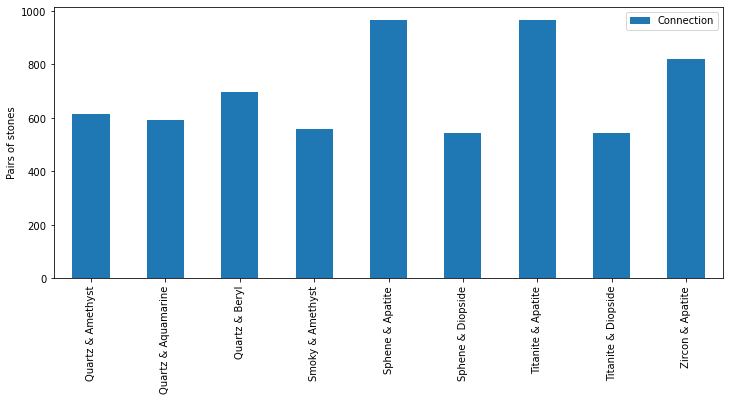

In [1528]:
fig, ax = plt.subplots(figsize=(12,5))
ax = connection_df.plot(kind='bar',ax=ax)
ax.set_ylabel("number of appearances")
ax.set_ylabel("Pairs of stones")

In [ ]:
Loc_df[Loc_df["Climate"].isnull()].shape

In [1380]:
###adding manually missing climate:
Loc_df[Loc_df["Climate"].isnull()]

,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,https://www.mindat.org/loc-14762.html,Lapis Lazuli Unakite,Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,NaN,"31.2612199,35.214581",Ag Al B Ba C Ca Ce Cl Cr Cu F Fe Gd H K La Mg ...,NaN,NaN,...,1,0,1,1,0,1,0,1,1,7
1,https://www.mindat.org//loc-145486.html,Lapis Lazuli Unakite,NaN,", Israel,i,Central District (HaMerkaz District...",NaN,NaN,"32.620121002197266,35.0147705078125",NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
2,https://www.mindat.org//loc-145489.html,Lapis Lazuli Unakite,Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,NaN,"31.7959242,35.2119808",Al B C Ca Cl Cr F Fe H K Mg N Na O P Si Sn Ti ...,NaN,NaN,...,1,0,0,1,0,0,0,0,1,7
3,https://www.mindat.org//loc-145488.html,Lapis Lazuli Unakite,NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,NaN,"32.6075587,35.2890861",Al C Ca H O Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
4,https://www.mindat.org//loc-205351.html,Lapis Lazuli Unakite,NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,NaN,"31.2612199,35.214581",Al C Ca Cl Fe H K Mg Mn Na Ni O Si Ti Zn,NaN,NaN,...,1,0,0,0,0,0,0,1,0,7
5,https://www.mindat.org//loc-225964.html,Lapis Lazuli Unakite,NaN,", Southern District (HaDarom District), Israel...",Marble,NaN,"31.2457442,34.7925181",Al Ba C Ca Cl Cr F Fe H Mg O P S Si Ti Zn,NaN,NaN,...,1,0,0,0,0,0,0,1,0,7
6,https://www.mindat.org//loc-191489.html,Lapis Lazuli Unakite,NaN,", Southern District (HaDarom District), Israel...",NaN,NaN,"31.0686612,35.0366482",Valid Species Al C Ca Cu Fe H Mg O S Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
7,https://www.mindat.org//loc-14768.html,Lapis Lazuli Unakite,NaN,", Southern District (HaDarom District), Israel...",NaN,NaN,"29.5569348,34.9497949",Valid Species O Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
8,https://www.mindat.org/loc-105764.html,Lapis Lazuli Unakite,Copper,", Southern District (HaDarom District), Israel...",NaN,NaN,"31.9469665,35.2738655",Ag Al Ba C Ca Cl Cu F Fe H K Mg Mn Na O P Pb S...,46.96177,14.95181,...,0,0,0,1,0,0,0,1,0,7
66,https://www.mindat.org//loc-210602.html,Andalusite Lapis Lazuli Unakite Zircon,NaN,", Sarzeau, Vannes, Morbihan, Brittany, France,...",NaN,NaN,"47.49500,-2.77389",Al Au B Ba Ca Ce Cl F Fe H K Mg O P S Si Sn Ti Zr,47.49500,-1.22611,...,1,0,0,0,0,0,0,0,1,2


In [1381]:
Climate_df

,0
1,Dfb : Warm-summer humid continental climate
2,Cfb : Temperate oceanic climate
3,Cwa : Monsoon-influenced humid subtropical cli...
4,Dfc : Subarctic climate
5,Cfa : Humid subtropical climate
6,"Aw : Tropical savanna, wet"
7,BSh : Hot semi-arid (steppe) climate
8,BWk : Cold desert climate
9,BWh : Hot deserts climate
10,ET : Tundra


In [1384]:
Loc_df["Climate"][0] = 15
Loc_df["Climate"][1] = 15
Loc_df["Climate"][2] = 15
Loc_df["Climate"][3] = 15
Loc_df["Climate"][4] = 7
Loc_df["Climate"][5] = 7
Loc_df["Climate"][6] = 7
Loc_df["Climate"][7] = 9
Loc_df["Climate"][8] = 15
Loc_df["Climate"][66] = 2
Loc_df["Climate"][97] = 2
Loc_df["Climate"][224] = 13
Loc_df["Climate"][264] = 3
Loc_df["Climate"][356] = 4
Loc_df["Climate"][543] = 1
Loc_df["Climate"][602] = 13
Loc_df["Climate"][762] = 5
Loc_df["Climate"][793] = 2
Loc_df["Climate"][1084] = 23
Loc_df["Climate"][1085] = 5


<ipython-input-1384-2fb03591967a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df["Climate"][0] = 15
<ipython-input-1384-2fb03591967a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df["Climate"][1] = 15
<ipython-input-1384-2fb03591967a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df["Climate"][2] = 15
<ipython-input-1384-2fb03591967a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [1387]:
Loc_df[Loc_df["Climate"].isnull()].shape

(0, 83)

In [1388]:
Loc_df[Loc_df["Longitude"].isnull()]

,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,https://www.mindat.org/loc-14762.html,Lapis Lazuli Unakite,Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,15,"31.2612199,35.214581",Ag Al B Ba C Ca Ce Cl Cr Cu F Fe Gd H K La Mg ...,NaN,NaN,...,1,0,1,1,0,1,0,1,1,7
1,https://www.mindat.org//loc-145486.html,Lapis Lazuli Unakite,NaN,", Israel,i,Central District (HaMerkaz District...",NaN,15,"32.620121002197266,35.0147705078125",NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
2,https://www.mindat.org//loc-145489.html,Lapis Lazuli Unakite,Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,15,"31.7959242,35.2119808",Al B C Ca Cl Cr F Fe H K Mg N Na O P Si Sn Ti ...,NaN,NaN,...,1,0,0,1,0,0,0,0,1,7
3,https://www.mindat.org//loc-145488.html,Lapis Lazuli Unakite,NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,15,"32.6075587,35.2890861",Al C Ca H O Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
4,https://www.mindat.org//loc-205351.html,Lapis Lazuli Unakite,NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,7,"31.2612199,35.214581",Al C Ca Cl Fe H K Mg Mn Na Ni O Si Ti Zn,NaN,NaN,...,1,0,0,0,0,0,0,1,0,7
5,https://www.mindat.org//loc-225964.html,Lapis Lazuli Unakite,NaN,", Southern District (HaDarom District), Israel...",Marble,7,"31.2457442,34.7925181",Al Ba C Ca Cl Cr F Fe H Mg O P S Si Ti Zn,NaN,NaN,...,1,0,0,0,0,0,0,1,0,7
6,https://www.mindat.org//loc-191489.html,Lapis Lazuli Unakite,NaN,", Southern District (HaDarom District), Israel...",NaN,7,"31.0686612,35.0366482",Valid Species Al C Ca Cu Fe H Mg O S Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
7,https://www.mindat.org//loc-14768.html,Lapis Lazuli Unakite,NaN,", Southern District (HaDarom District), Israel...",NaN,9,"29.5569348,34.9497949",Valid Species O Si,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7


In [1395]:
#adding missing coords
for ind in Loc_df[Loc_df["Longitude"].isnull()].index:
    full_coords = Loc_df["Decimal Coordinates"][ind]
    comma = full_coords.find(',')
    Latitude = full_coords[:comma]
    Longitude = full_coords[comma+1:]
    Loc_df["Latitude"][ind] = Latitude
    Loc_df["Longitude"][ind] = Longitude

<ipython-input-1395-e2c45cc2a4f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df["Latitude"][ind] = Latitude
<ipython-input-1395-e2c45cc2a4f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_df["Longitude"][ind] = Longitude


In [1397]:
Loc_df[Loc_df["Longitude"].isnull()].shape[0]

0

In [1398]:
new_df = Loc_df.drop(["Location URL","Stone Refernced","Location Name","Rock Types","Decimal Coordinates","Minerals","Minerals Recorded"],axis=1)
new_df

,Climate,Latitude,Longitude,Ag,Al,As,Au,B,Ba,Be,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,15,31.261220,35.214581,1,1,0,0,1,1,0,...,1,0,1,1,0,1,0,1,1,7
1,15,32.620121,35.014771,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,15,31.795924,35.211981,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,7
3,15,32.607559,35.289086,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,7,31.261220,35.214581,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,13,32.065560,-109.959440,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1604,15,33.897470,-115.462220,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,6
1605,12,39.263610,-118.359440,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,3
1606,2,35.943050,-81.910000,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,7


In [1189]:
###################################

In [1400]:
new_df.to_csv("Final_clean_dataSet.csv")
Loc_df.to_csv("Final_clean_Loc_df.csv")